### Introduction to Machine Learning with Python
## Chapter 3. 비지도 학습과 데이터 전처리
---
## DBSCAN 군집화

- DBSCAN 은 반지름과 샘플갯수가 주어지면 그 반지름 안에 해당 샘플갯수만큼 있는 이웃을 확장해 나가는 군집 알고리즘이다.
- 아래 그림은 샘플갯수가 4개, 반지름이 $\epsilon$ 인 경우이다. 빨간 점은 **핵심샘플**, 노란 점은 **경계샘플**, N은 **잡음샘플** 이다.

<img src="ch03_02.jpg"/>
<p style="text-align: center;">(출처: https://en.wikipedia.org/wiki/DBSCAN)</p>

In [1]:
%pylab inline

import numpy as np
import numpy as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


(100, 2)

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

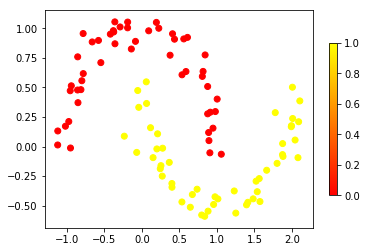

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_moons(noise=0.1)
display(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

In [47]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3, eps=0.3)
label = dbscan.fit_predict(X)
display(label, np.bincount(label+1)) # 결과에서 -1 은 잡음샘플

array([ 0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,
        1,  0,  1,  0,  1,  1,  1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  0,  1,  0,
        1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1],
      dtype=int32)

array([ 1, 50, 49], dtype=int32)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


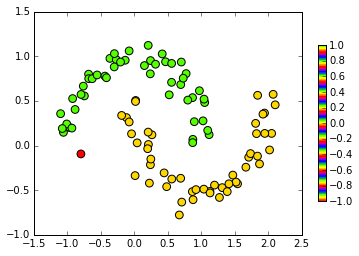

In [55]:
plt.scatter(X[:,0], X[:,1], c=label, s=60, cmap='prism')
plt.colorbar(shrink=0.7)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


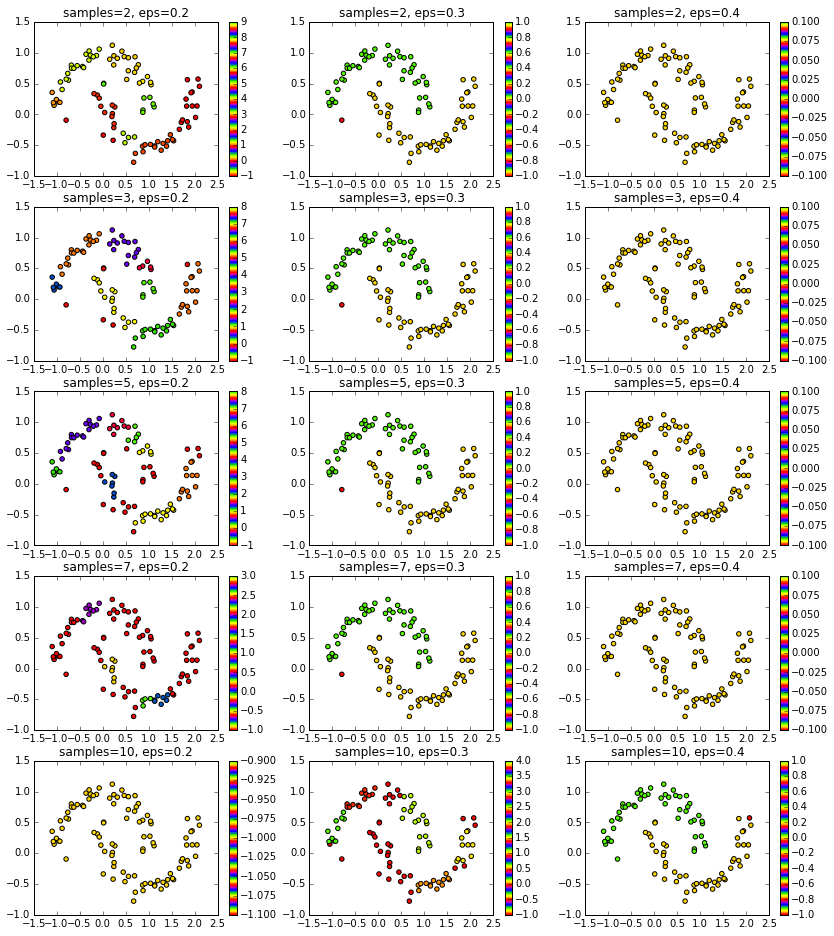

In [43]:
n=1
plt.figure(figsize=[14,16])

for samples in [2,3,5,7,10]:
    for eps in [0.2, 0.3, 0.4]:
        dbscan = DBSCAN(min_samples=samples, eps=eps)
        label = dbscan.fit_predict(X)
        
        plt.subplot(5,3,n); n+=1
        plt.title('samples=%d, eps=%.1f' % (samples,eps))
        plt.scatter(X[:,0], X[:,1], c=label, cmap='prism')
        plt.colorbar()